# Predicting risk factors for heart disease

This project uses the following dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

#### Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
file_path = "~/data/processed.cleveland.data"
col_names = ['age', 'sex', 'chest_pain', 'rest_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
            'max_heart_rate', 'exercise_angina', 'st_depression', 'st_slope', 'blood_vessels', 'thalassemia', 
            'diagnosis']
heart_data = pd.read_csv(file_path, delimiter=",", names=col_names)
heart_data.head(10)

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,blood_vessels,thalassemia,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


#### Variables (after processing)

1. age: age (years)

2. sex: sex -
1 = male;
0 = female

3. chest_pain: chest pain type - 
1: typical angina;
2: atypical angina;
3: non-anginal pain;
4: asymptomatic

4. rest_blood_pressure: resting blood pressure on admission to the hospital (mm Hg)

5. cholesterol: serum cholesterol (mg/dl)

6. fasting_blood_sugar: fasting blood sugar (> 120 mg/dl) -
1 = true;
0 = false

7. restecg: resting electrocardiographic results - 
0: normal;
1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV);
2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. max_heart_rate: maximum heart rate achieved

9. exercise_angina: exercise induced angina -
1 = yes;
0 = no

10. st_depression: ST depression induced by exercise relative to rest

11. st_slope: the slope of the peak exercise ST segment - 
1: upsloping;
2: flat;
3: downsloping

12. blood_vessels: number of major vessels (0-3) coloured by flouroscopy

13. thalassemia -
3 = fixed defect;
6 = normal blood flow;
7 = reversible defect

14. diagnosis -
0: < 50% narrowing of coronary arteries - "no heart disease";
1: > 50% narrowing of coronary arteries - "heart disease"

#### Clean data

As mentioned on the dataset's website, experiments have concentrated on distinguishing the presence of heart disease diagnosis (diagnosis = 1 - 4) and no heart disease diagnosis (diagnosis = 0). Convert target variable to binary, where:

0: < 50% narrowing of coronary arteries - "no heart disease"

1: > 50% narrowing of coronary arteries - "heart disease"

In [3]:
heart_data.loc[heart_data['diagnosis'] > 0, 'diagnosis'] =  1
heart_data

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,blood_vessels,thalassemia,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Check for null values. Note that missing values are also represented by question marks (?) in this dataset.

In [4]:
heart_data.replace('?', np.nan, inplace=True)
heart_data.isna().any().any()

True

Remove rows with empty values

In [5]:
heart_data.dropna(inplace=True)
heart_data

,age,sex,chest_pain,rest_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,blood_vessels,thalassemia,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [6]:
heart_data.isna().any().any()

False

### Exploratory Data Analysis

In [7]:
categorical = ['sex', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exercise_angina', 'st_slope', 
               'blood_vessels', 'thalassemia']
continuous = ['age', 'rest_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']
categorical_and_target = categorical + ['diagnosis']
continuous_and_target = continuous + ['diagnosis']

#### Summary statistics

In [8]:
heart_data[continuous].describe()

,age,rest_blood_pressure,cholesterol,max_heart_rate,st_depression
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [9]:
results = heart_data.groupby(['diagnosis']).agg({'diagnosis': 'count'})
results = results.rename(columns={'diagnosis': 'count'})
results['%'] = 100 * results.loc[:,['count']] / sum(results['count'])
results

,count,%
diagnosis,,
0,160,53.872054
1,137,46.127946


The target variable (results) is roughly balanced (about 54% without heart disease and 46% with heart disease). No need to worry about imbalance of target categories.

#### Pairplot for continuous variables

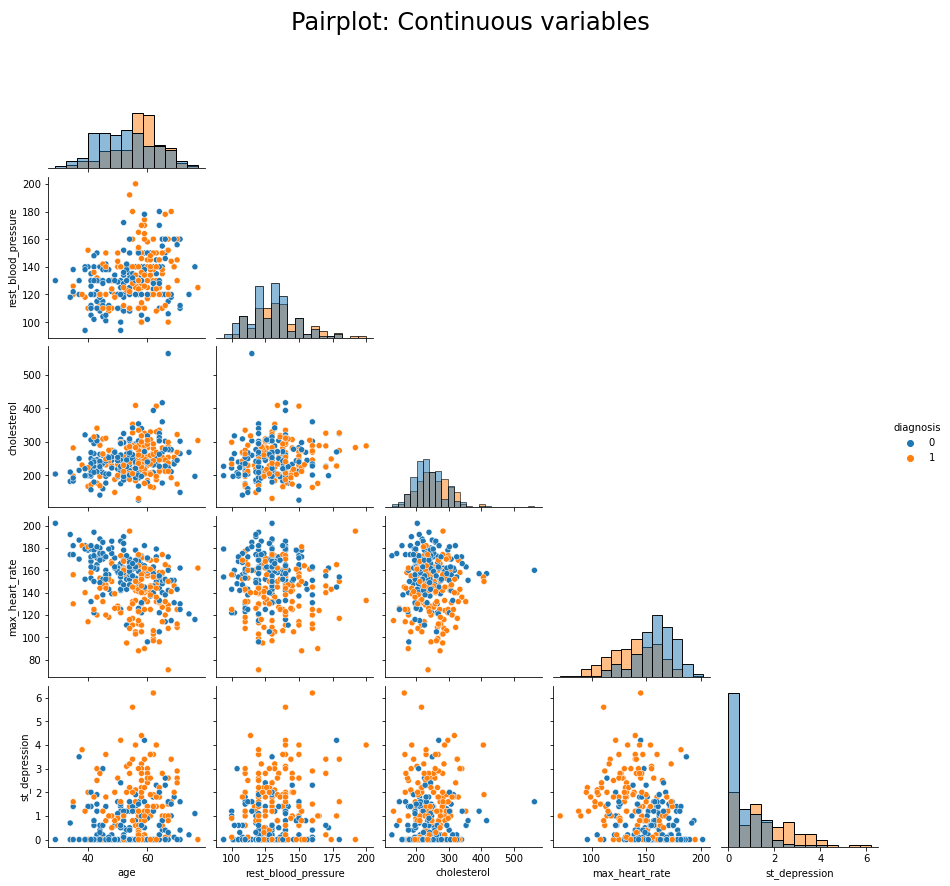

In [10]:
pairplot = sns.pairplot(heart_data[continuous_and_target], hue="diagnosis", corner=True, diag_kind='hist');
plt.suptitle('Pairplot: Continuous variables', fontsize = 24);

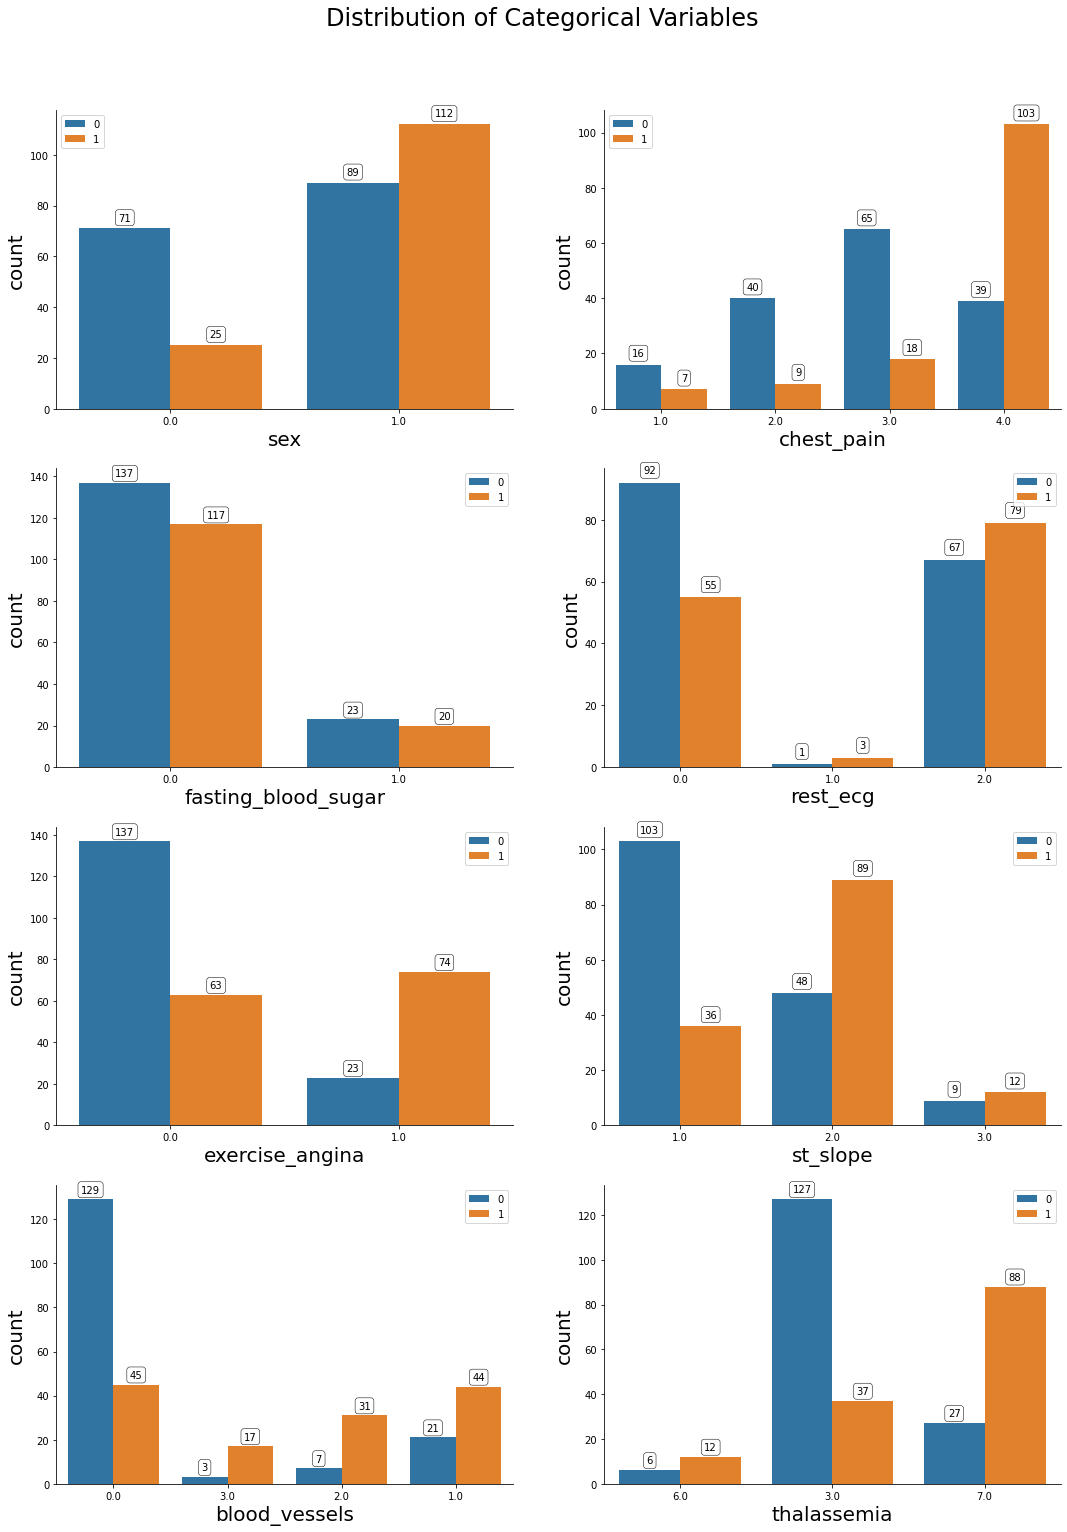

In [11]:
def count_plot(data, categorical_vars):    
    L = len(categorical_vars)
    ncol= 2
    nrow= int(np.ceil(L/ncol))

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24))    
    fig.subplots_adjust(top=0.92)

    i = 1
    for col in categorical_vars:
        plt.subplot(nrow, ncol, i)
        ax = sns.countplot(data=data, x=col, hue="diagnosis")
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend()
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Variables', fontsize = 24)
    return 0

count_plot(heart_data, categorical);

#### Correlations
##### Continuous variables - Pearson and Point Biserial correlation

Pearson correlation measures correlation (strength and direction of the relationship) between two continuous variables. Point-biserial correlation measures correlation between a continuous variable and a binary variable. Here Pearson and Point Biserial correlation have been combined to analyze the relationships amongst continuous variables, as well as between each continuous variable and the binary diagnosis variable.

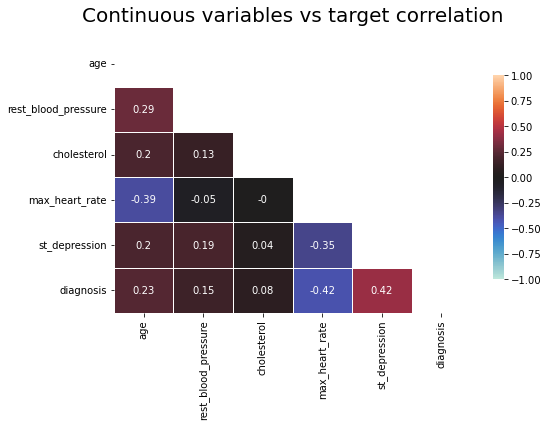

In [12]:
df = heart_data[continuous]
corr = df.corr(method='pearson')
def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in continuous_and_target:
    col = []
    for y in continuous_and_target:
        pbs =point_biserial(heart_data[x], heart_data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = heart_data[continuous_and_target].columns, 
                  index =heart_data[continuous_and_target].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
sns.heatmap(corr, mask=mask, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Continuous variables vs target correlation", fontsize=20, y= 1.05);

##### Categorical variables - Crammer's V correlation

Crammer's V correlation measures strength and direction of the relationship between two categorical variables. Here, Crammer's V correlation is used to analyze the relationships amongst categorical variables, including the binary diagnosis variable.

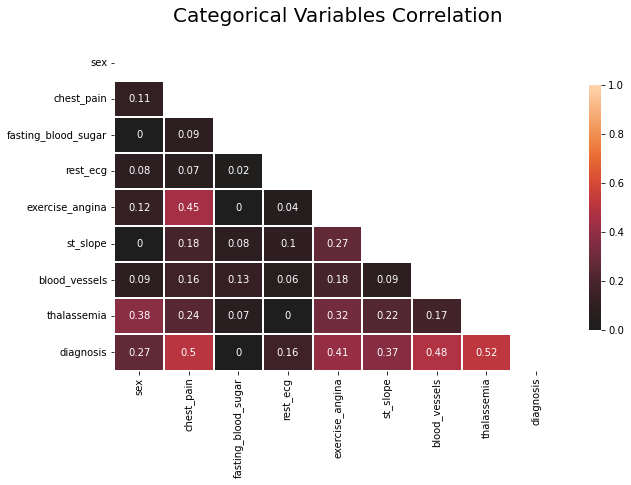

In [13]:
# cramers_v function from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate correlation coefficients using function above
categorical_data = heart_data[categorical_and_target]
rows= []
for x in categorical_data:
    col = []
    for y in categorical_data :
        cramers =cramers_v(categorical_data[x], categorical_data[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = categorical_data.columns, index = categorical_data.columns)
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
sns.heatmap(corr, mask=mask, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Variables Correlation", fontsize=20, y= 1.05);

Key points of Exploratory Data Analysis:

Target variable is fairly balanced, 54% no diagnosis disease to 46% has diagnosis

Correlations between predictors variables and target (diagnosis):

For the continuous variables, max heart rate and ST depression are the most strongly correlated with the target variable, with correlation coefficients 0.43 and -0.43 correlation coefficients respectively.

For the categorical variables, chest pain type, exercise induced angina, number of major vessels coloured by fluoroscopy, thalassemia, and are significantly correlated with the target variable, with correlation coefficients 0.5, 0.41, 0.48, and 0.52 respectively.

### Model training

First, the data is split into training and testing sets.

In [14]:
y = heart_data["diagnosis"]
X = heart_data.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

Next, the training data is scaled so that variables are standardized before being inputted into the model.

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Finally, the logistic regression model is trained. An accuracy score of ~85% was obtained on the test data of 75 patients.

A false positive rate of ~3% (or sensitivity of ~97%) and false negative rate of ~12% (or specificity of ~88%) were also obtained.

In [16]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score,'\n')

Confusion matrix
[[37  2]
 [ 9 27]]


Accuracy of Logistic Regression: 0.8533333333333334 

